In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# -----------------------------
# Define marker genes
# -----------------------------
marker_genes = ["CD34", "SPINK2", "SLAMF7", "CD27", "PF4","PPBP","CD79B","CD79A","MS4A1","CD19","CD72","CD40","CD22","NKG7",
                "GZMB","FGFBP2","SPON2","KLRC1","KLRD1","MS4A7","FCN1","S100A12","S100A9","S100A8","FCGR3A","CD14","LDHB","CD4",
                "CD8B","CD8A","CD3D","CD3E","CD3G"]

# Folders for each method
imputed_dir = {
    "SoftImpute": "imputed_softimpute",
    "MAGIC": "imputed_h5ad",
    "KNN": "imputed_knn",
    "Mean": "imputed_mean",
    "GAN": "imputed_gan",
    "Iterative": "imputed_iterative"
}

# -----------------------------
# Marker correlation function
# -----------------------------
def marker_gene_correlation(adata_gt, adata_imp, markers):
    """Compute Spearman correlation for marker genes between GT and imputed."""
    common_genes = [g for g in markers if g in adata_gt.var_names and g in adata_imp.var_names]
    if len(common_genes) == 0:
        return {}

    gt_expr = adata_gt[:, common_genes].X.toarray() if not isinstance(adata_gt.X, np.ndarray) else adata_gt[:, common_genes].X
    imp_expr = adata_imp[:, common_genes].X.toarray() if not isinstance(adata_imp.X, np.ndarray) else adata_imp[:, common_genes].X

    corrs = {}
    for i, g in enumerate(common_genes):
        rho, _ = spearmanr(gt_expr[:, i], imp_expr[:, i])
        corrs[g] = rho
    return corrs


# -----------------------------
# Evaluate marker preservation
# -----------------------------
results = []

for fname in os.listdir(imputed_dir):
    if not fname.endswith(".h5ad"):
        continue

    fpath = os.path.join(imputed_dir, fname)
    try:
        adata_imp = sc.read_h5ad(fpath)

        # Align cells
        common_cells = adata_gt.obs_names.intersection(adata_imp.obs_names)
        adata_gt_sub = adata_gt[common_cells]
        adata_imp_sub = adata_imp[common_cells]

        # --- Marker correlations ---
        marker_corrs = marker_gene_correlation(adata_gt_sub, adata_imp_sub, marker_genes)

        # Parse metadata
        mf, run, method = None, None, None
        for part in fname.split("_"):
            if part.startswith("mf"):
                mf = float(part.replace("mf", "").replace(".h5ad", "")) / 100
            if part.startswith("run"):
                run = int(part.replace("run", "").replace(".h5ad", ""))
            if part.lower() in ["softimpute", "magic", "knn", "mean", "gan", "iterative"]:
                method = part

        # Store results
        for g, val in marker_corrs.items():
            results.append({
                "file": fname,
                "method": method,
                "missing_fraction": mf,
                "run": run,
                "marker_gene": g,
                "correlation": val
            })

        print(f"{fname}: {marker_corrs}")

    except Exception as e:
        print(f"Error with {fname}: {e}")


# -----------------------------
# Results DataFrame
# -----------------------------
results_df = pd.DataFrame(results)
results_df.to_csv("marker_gene_preservation.csv", index=False)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_df,
    x="missing_fraction",
    y="correlation",
    hue="method",
    ci="sd"
)
plt.title("Marker Gene Preservation (Spearman Correlation)")
plt.ylabel("Correlation (GT vs Imputed)")
plt.xlabel("Missing Fraction")
plt.legend(title="Method")
plt.show()


TypeError: listdir: path should be string, bytes, os.PathLike or None, not dict

 Preprocessing ground truth...


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ SoftImpute - adata_softimpute_imputed_mf10_run1.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run10.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run2.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run3.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run4.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run5.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run6.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run7.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run8.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf10_run9.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf20_run1.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf20_run10.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf20_run2.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf20_run3.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf20_run4.h5ad: Done
✅ SoftImpute - adata_softimpute_imputed_mf20_run5.h5ad: Done
✅ SoftImpute - adata_s

c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run9.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run9.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run9.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run1.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run10.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run2.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run3.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run4.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run5.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run6.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run7.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run8.h5ad: Done
✅ KNN - adata_knn_imputed_mf10_run9.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run1.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run10.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run2.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run3.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run4.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run5.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run6.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run7.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run8.h5ad: Done
✅ KNN - adata_knn_imputed_mf20_run9.h5ad: Done
✅ KNN -

c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run9.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run9.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run9.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run9.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run9.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run1.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run10.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run2.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run3.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run4.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run5.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run6.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run7.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run8.h5ad: Done


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run9.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run1.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run10.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run2.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run3.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run4.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run5.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run6.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run7.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run8.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf10_run9.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf20_run1.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf20_run10.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf20_run2.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf20_run3.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf20_run4.h5ad: Done
✅ Iterative - adata_iterative_imputed_mf20_run5.h5ad: Done
✅

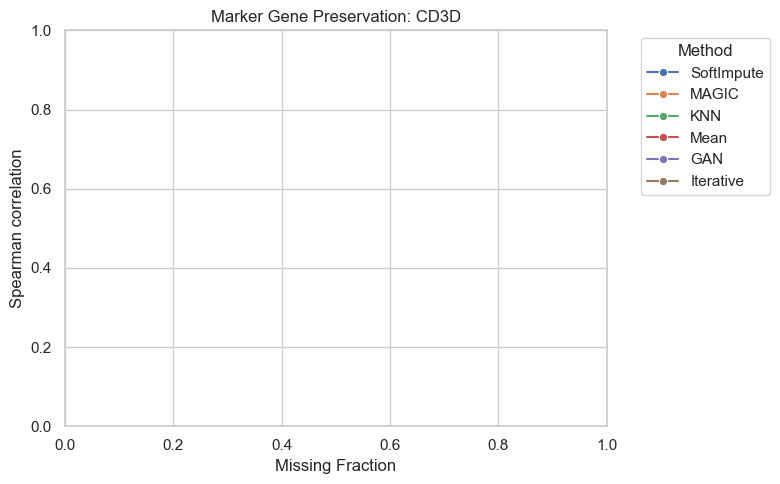

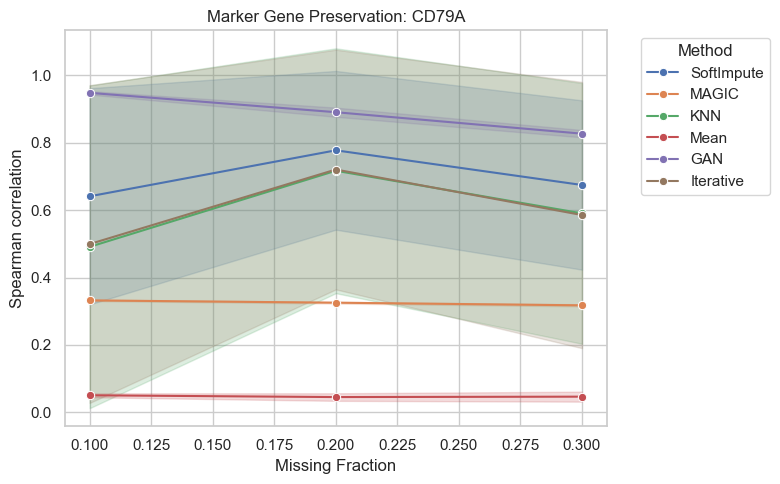

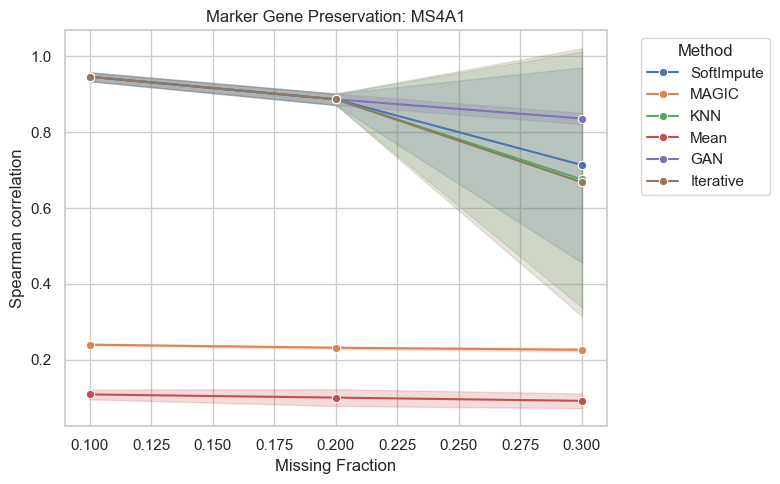

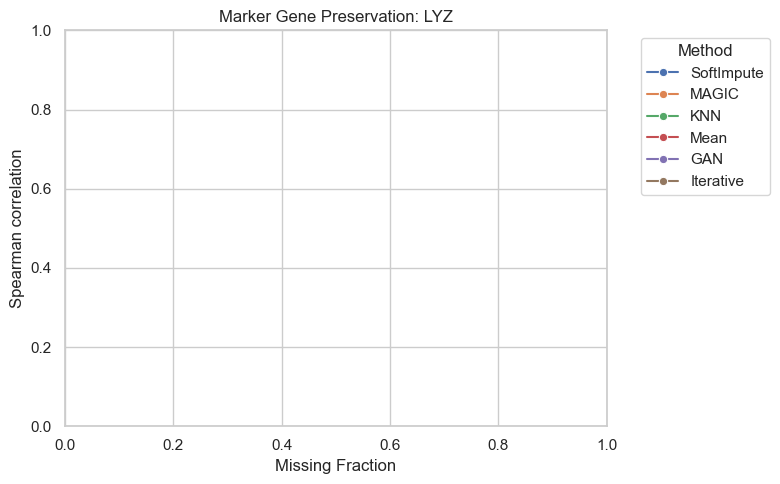

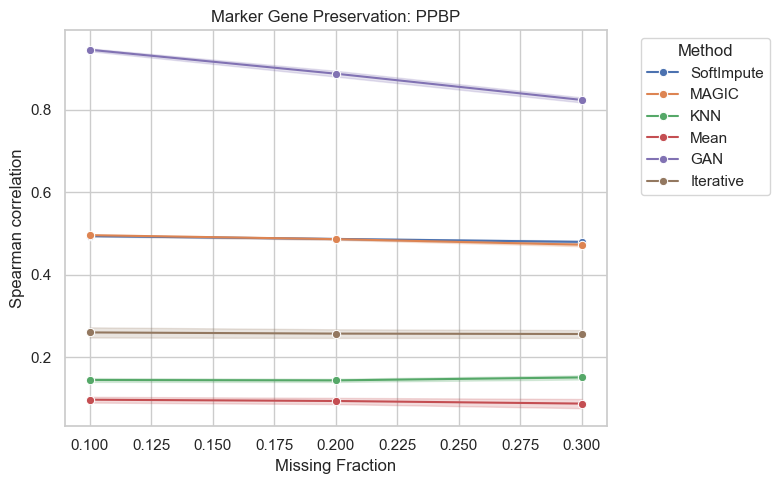

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# -----------------------------
# Settings
# -----------------------------
sc.settings.verbosity = 0
sns.set(style="whitegrid")

ground_truth_path = "Data/adata_raw_qc.h5ad"

# Folders for each method
imputed_dirs = {
    "SoftImpute": "imputed_softimpute",
    "MAGIC": "imputed_h5ad",
    "KNN": "imputed_knn",
    "Mean": "imputed_mean",
    "GAN": "imputed_gan",
    "Iterative": "imputed_iterative"
}

# Define marker genes (replace with real ones from paper/dataset)
marker_genes = ["CD34", "SPINK2", "SLAMF7", "CD27", "PF4","PPBP","CD79B","CD79A","MS4A1","CD19","CD72","CD40","CD22","NKG7",
                "GZMB","FGFBP2","SPON2","KLRC1","KLRD1","MS4A7","FCN1","S100A12","S100A9","S100A8","FCGR3A","CD14","LDHB","CD4",
                "CD8B","CD8A","CD3D","CD3E","CD3G"]

# -----------------------------
# Load ground truth
# -----------------------------
print(" Preprocessing ground truth...")
adata_gt = sc.read_h5ad(ground_truth_path)
adata_gt.var_names_make_unique()
adata_gt.obs_names_make_unique()
adata_gt.X = np.nan_to_num(adata_gt.X, nan=0.0, posinf=0.0, neginf=0.0)

# -----------------------------
# Helper: Marker preservation
# -----------------------------
def check_marker_gene_preservation(adata_gt, adata_imp, markers):
    preserved = {}
    common_genes = adata_gt.var_names.intersection(adata_imp.var_names)

    for gene in markers:
        if gene not in common_genes:
            preserved[gene] = np.nan
            continue

        # Extract expression
        gt_expr = adata_gt[:, gene].X
        imp_expr = adata_imp[:, gene].X

        # Convert sparse to dense if needed
        if not isinstance(gt_expr, np.ndarray):
            gt_expr = gt_expr.toarray().flatten()
        else:
            gt_expr = np.array(gt_expr).flatten()

        if not isinstance(imp_expr, np.ndarray):
            imp_expr = imp_expr.toarray().flatten()
        else:
            imp_expr = np.array(imp_expr).flatten()

        # Compute Spearman correlation
        if np.std(gt_expr) < 1e-8 or np.std(imp_expr) < 1e-8:
            preserved[gene] = np.nan
        else:
            rho, _ = spearmanr(gt_expr, imp_expr)
            preserved[gene] = rho

    return preserved

# -----------------------------
# Evaluate all methods
# -----------------------------
results = []

for method, imputed_dir in imputed_dirs.items():
    if not os.path.exists(imputed_dir):
        print(f"⚠️ Skipping {method}, folder not found: {imputed_dir}")
        continue

    for fname in os.listdir(imputed_dir):
        if not fname.endswith(".h5ad"):
            continue

        fpath = os.path.join(imputed_dir, fname)
        try:
            adata_imp = sc.read_h5ad(fpath)
            adata_imp.var_names_make_unique()
            adata_imp.obs_names_make_unique()
            adata_imp.X = np.nan_to_num(adata_imp.X, nan=0.0, posinf=0.0, neginf=0.0)

            # Align common cells
            common_cells = adata_gt.obs_names.intersection(adata_imp.obs_names)
            adata_gt_sub = adata_gt[common_cells]
            adata_imp_sub = adata_imp[common_cells]

            # Compute marker preservation
            marker_corrs = check_marker_gene_preservation(adata_gt_sub, adata_imp_sub, marker_genes)

            # Parse metadata (mfXX, runX)
            mf, run = None, None
            for part in fname.split("_"):
                if part.startswith("mf"):
                    mf = float(part.replace("mf", "").replace(".h5ad", "")) / 100
                if part.startswith("run"):
                    run = int(part.replace("run", "").replace(".h5ad", ""))

            res = {
                "file": fname,
                "method": method,
                "missing_fraction": mf,
                "run": run
            }
            for g, val in marker_corrs.items():
                res[f"Marker_{g}"] = val

            results.append(res)
            print(f"✅ {method} - {fname}: Done")

        except Exception as e:
            print(f"❌ Error with {method} - {fname}: {e}")

# -----------------------------
# Results → DataFrame
# -----------------------------
results_df = pd.DataFrame(results)
results_df.to_csv("marker_gene_preservation.csv", index=False)

if results_df.empty:
    raise ValueError("No marker correlations computed!")

# -----------------------------
# Plot marker preservation
# -----------------------------
# -----------------------------
# Plot marker preservation
# -----------------------------
for gene in marker_genes:
    col = f"Marker_{gene}"
    if col not in results_df.columns:
        continue
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=results_df,
        x="missing_fraction",
        y=col,
        hue="method",
        marker="o",
        errorbar="sd"
    )
    plt.title(f"Marker Gene Preservation: {gene}")
    plt.ylabel("Spearman correlation")
    plt.xlabel("Missing Fraction")
    plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


 Preprocessing ground truth...


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.869


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.869


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.871


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.868


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.869


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.868


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.869


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.869


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.870


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf10_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.871


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.822


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.823


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.821


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.822


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.820


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.821


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.823


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.821


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.820


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf20_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.820


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.770


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.769


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.764


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.770


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.770


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.765


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.770


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.769


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.768


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ SoftImpute - adata_softimpute_imputed_mf30_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.769


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.149


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.149


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.149


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.150


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.149


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.149


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.150


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.149


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.150


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf10_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.149


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.144


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.145


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.145


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.145


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.145


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.144


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.145


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.144


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.145


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf20_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.144


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ MAGIC - adata_magic_imputed_mf30_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.139


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.860


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.862


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.859


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.857


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.858


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.857


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.859


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.862


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.864


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf10_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.863


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.810


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.811


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.808


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.810


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.808


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.810


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.812


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.810


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.809


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf20_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.808


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.757


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.756


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.752


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.759


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.757


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.753


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.758


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.757


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.756


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ KNN - adata_knn_imputed_mf30_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.756


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.128


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.129


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.130


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.132


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.131


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.128


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.126


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.132


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.131


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf10_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.130


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.122


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.121


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.116


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.116


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.121


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.122


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.119


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.117


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.121


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf20_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.116


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.105


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.106


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.109


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.105


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.110


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.109


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.109


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.108


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.107


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Mean - adata_mean_imputed_mf30_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=-0.108


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.947


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.947


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.949


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.947


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.948


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.946


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.948


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.949


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.949


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf10_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.949


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.895


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.896


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.894


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.895


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.894


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.894


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.896


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.894


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.894


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf20_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.892


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.836


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.835


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.833


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.837


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.837


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.833


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.838


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.836


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.835


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ GAN - adata_adata_gan_imputed_mf30_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.837


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.861


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.864


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.861


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.859


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.860


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.858


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.861


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.863


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.865


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf10_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.864


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.813


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.813


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.810


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.813


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.810


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.812


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.814


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.812


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.810


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf20_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.810


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run1.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.759


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run10.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.758


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run2.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.754


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run3.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.761


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run4.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.760


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run5.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.755


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run6.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.759


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run7.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.758


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run8.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.758


C:\Users\prath\AppData\Local\Temp\ipykernel_25868\2043242487.py:68: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])


✅ Iterative - adata_iterative_imputed_mf30_run9.h5ad: ARI=1.000, Sil=nan, GeneCorr=0.758

✅ Saved results to evaluation_marker_genes.csv


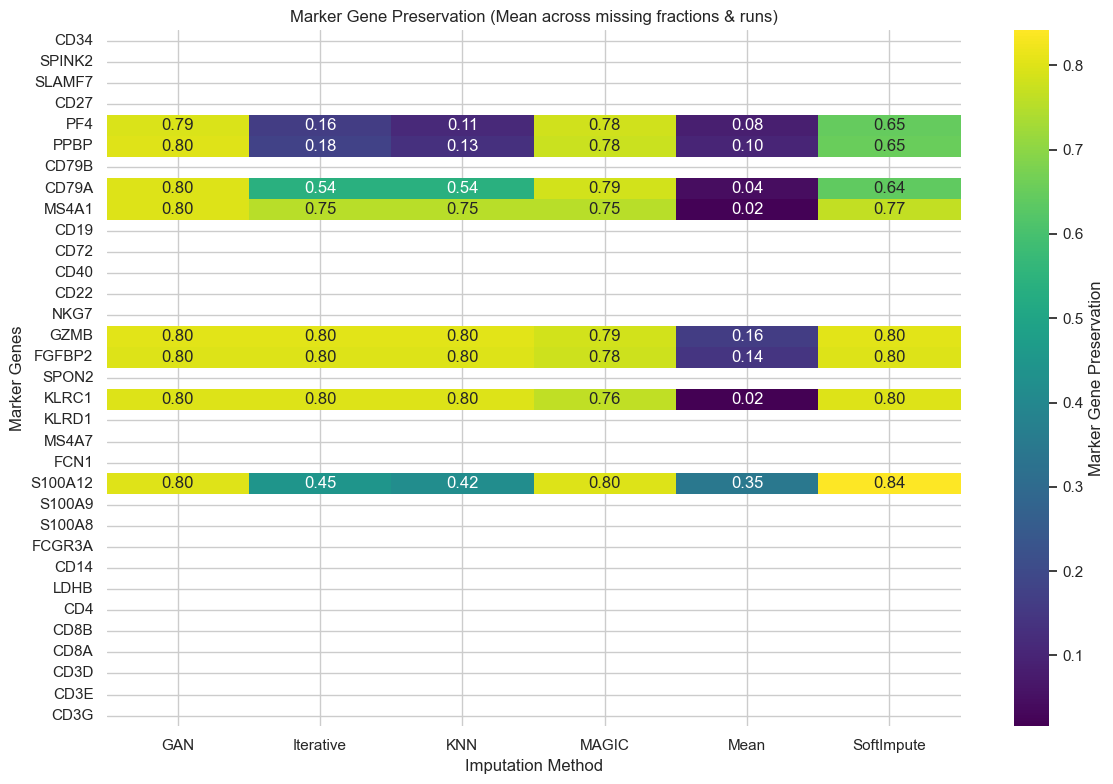

In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score as ari_score
from sklearn.metrics import silhouette_score
from scipy.stats import spearmanr

# -----------------------------
# Settings
# -----------------------------
sc.settings.verbosity = 0
sns.set(style="whitegrid")

ground_truth_path = "Data/adata_raw_qc.h5ad"

# Folders for each method
imputed_dirs = {
    "SoftImpute": "imputed_softimpute",
    "MAGIC": "imputed_h5ad",
    "KNN": "imputed_knn",
    "Mean": "imputed_mean",
    "GAN": "imputed_gan",
    "Iterative": "imputed_iterative"
}

# Define marker genes (from your list)
marker_genes = [
    "CD34", "SPINK2", "SLAMF7", "CD27", "PF4","PPBP","CD79B","CD79A","MS4A1","CD19","CD72","CD40","CD22","NKG7",
                "GZMB","FGFBP2","SPON2","KLRC1","KLRD1","MS4A7","FCN1","S100A12","S100A9","S100A8","FCGR3A","CD14","LDHB","CD4",
                "CD8B","CD8A","CD3D","CD3E","CD3G"]

# -----------------------------
# Helper functions
# -----------------------------
def preprocess_adata(adata):
    """Basic preprocessing to ensure clean AnnData."""
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata.X = np.nan_to_num(adata.X, nan=0.0, posinf=0.0, neginf=0.0)
    return adata


def compute_silhouette(adata):
    """Compute silhouette score from PCA representation & leiden labels."""
    if "X_pca" not in adata.obsm or "leiden" not in adata.obs:
        return np.nan
    try:
        score = silhouette_score(adata.obsm["X_pca"], adata.obs["leiden"])
    except Exception:
        score = np.nan
    return score


def compute_gene_correlation(adata_gt, adata_imp):
    """Compute gene-wise Spearman correlation between ground truth and imputed."""
    common_genes = adata_gt.var_names.intersection(adata_imp.var_names)
    if len(common_genes) == 0:
        return np.nan
    
    gt_expr = adata_gt[:, common_genes].X.toarray() if not isinstance(adata_gt.X, np.ndarray) else adata_gt[:, common_genes].X
    imp_expr = adata_imp[:, common_genes].X.toarray() if not isinstance(adata_imp.X, np.ndarray) else adata_imp[:, common_genes].X
    
    corrs = []
    for g in range(len(common_genes)):
        rho, _ = spearmanr(gt_expr[:, g], imp_expr[:, g])
        corrs.append(rho)
    return np.nanmean(corrs)


def check_marker_gene_preservation(adata_gt, adata_imp, markers):
    """Compare average expression of marker genes between GT and imputed."""
    preserved = {}
    for gene in markers:
        if gene not in adata_gt.var_names or gene not in adata_imp.var_names:
            preserved[gene] = np.nan
            continue
        mean_gt = np.mean(adata_gt[:, gene].X)
        mean_imp = np.mean(adata_imp[:, gene].X)
        # Spearman correlation is not defined for single values → fallback to ratio
        if mean_gt > 0 and mean_imp > 0:
            preserved[gene] = min(mean_gt, mean_imp) / max(mean_gt, mean_imp)
        else:
            preserved[gene] = np.nan
    return preserved

# -----------------------------
# Load ground truth
# -----------------------------
print(" Preprocessing ground truth...")
adata_gt = sc.read_h5ad(ground_truth_path)
adata_gt = preprocess_adata(adata_gt)

# -----------------------------
# Evaluate all methods
# -----------------------------
results = []

for method, imputed_dir in imputed_dirs.items():
    if not os.path.exists(imputed_dir):
        print(f"Skipping {method}, folder not found: {imputed_dir}")
        continue

    for fname in os.listdir(imputed_dir):
        if not fname.endswith(".h5ad"):
            continue

        fpath = os.path.join(imputed_dir, fname)
        try:
            adata_imp = sc.read_h5ad(fpath)
            adata_imp = preprocess_adata(adata_imp)

            # Align cells
            common_cells = adata_gt.obs_names.intersection(adata_imp.obs_names)
            adata_gt_sub = adata_gt[common_cells]
            adata_imp_sub = adata_imp[common_cells]

            # --- Metrics ---
            ari = ari_score(adata_gt_sub.obs["leiden"], adata_imp_sub.obs["leiden"]) if "leiden" in adata_gt_sub.obs and "leiden" in adata_imp_sub.obs else np.nan
            sil = compute_silhouette(adata_imp_sub)
            gene_corr = compute_gene_correlation(adata_gt_sub, adata_imp_sub)
            marker_corrs = check_marker_gene_preservation(adata_gt_sub, adata_imp_sub, marker_genes)

            # Parse metadata
            mf, run = None, None
            for part in fname.split("_"):
                if part.startswith("mf"):
                    mf = float(part.replace("mf", "").replace(".h5ad", "")) / 100
                if part.startswith("run"):
                    run = int(part.replace("run", "").replace(".h5ad", ""))

            res = {
                "file": fname,
                "method": method,
                "ARI": ari,
                "Silhouette": sil,
                "GeneCorr": gene_corr,
                "missing_fraction": mf,
                "run": run
            }
            # Add marker gene results
            for g, val in marker_corrs.items():
                res[f"Marker_{g}"] = val

            results.append(res)

            print(f"✅ {method} - {fname}: ARI={ari:.3f}, Sil={sil:.3f}, GeneCorr={gene_corr:.3f}")

        except Exception as e:
            print(f"❌ Error with {method} - {fname}: {e}")

# -----------------------------
# Results DataFrame
# -----------------------------
results_df = pd.DataFrame(results)
results_df.to_csv("evaluation_marker_genes.csv", index=False)

print("\n✅ Saved results to evaluation_marker_genes.csv")

# -----------------------------
# Heatmap of Marker Gene Preservation
# -----------------------------
marker_cols = [c for c in results_df.columns if c.startswith("Marker_")]

if len(marker_cols) == 0:
    print("⚠️ No marker gene results found in results_df")
else:
    marker_data = results_df.groupby("method")[marker_cols].mean().T
    marker_data.index = [g.replace("Marker_", "") for g in marker_data.index]

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        marker_data,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        cbar_kws={'label': 'Marker Gene Preservation'}
    )
    plt.title("Marker Gene Preservation (Mean across missing fractions & runs)")
    plt.ylabel("Marker Genes")
    plt.xlabel("Imputation Method")
    plt.tight_layout()
    plt.show()


 Preprocessing ground truth...


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ SoftImpute - adata_softimpute_imputed_mf10_run1.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run10.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run2.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run3.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run4.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run5.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run6.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run7.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run8.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf10_run9.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf20_run1.h5ad: marker preservation computed
✅ SoftImpute - adata_softimpute_imputed_mf20_run10.h5ad: marker 

c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf10_run9.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf20_run9.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ MAGIC - adata_magic_imputed_mf30_run9.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run1.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run10.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run2.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run3.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run4.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run5.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run6.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run7.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run8.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf10_run9.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf20_run1.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf20_run10.h5ad: marker preservation computed
✅ KNN - adata_knn_imputed_mf20_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf10_run9.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf20_run9.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ Mean - adata_mean_imputed_mf30_run9.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf10_run9.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf20_run9.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run1.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run10.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run2.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run3.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run4.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run5.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run6.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run7.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run8.h5ad: marker preservation computed


c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\prath\anaconda-new\Lib\site-packages\anndata\_core\anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


✅ GAN - adata_adata_gan_imputed_mf30_run9.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run1.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run10.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run2.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run3.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run4.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run5.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run6.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run7.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run8.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf10_run9.h5ad: marker preservation computed
✅ Iterative - adata_iterative_imputed_mf20_run1.h5ad: marker preservation computed
✅ Iterati

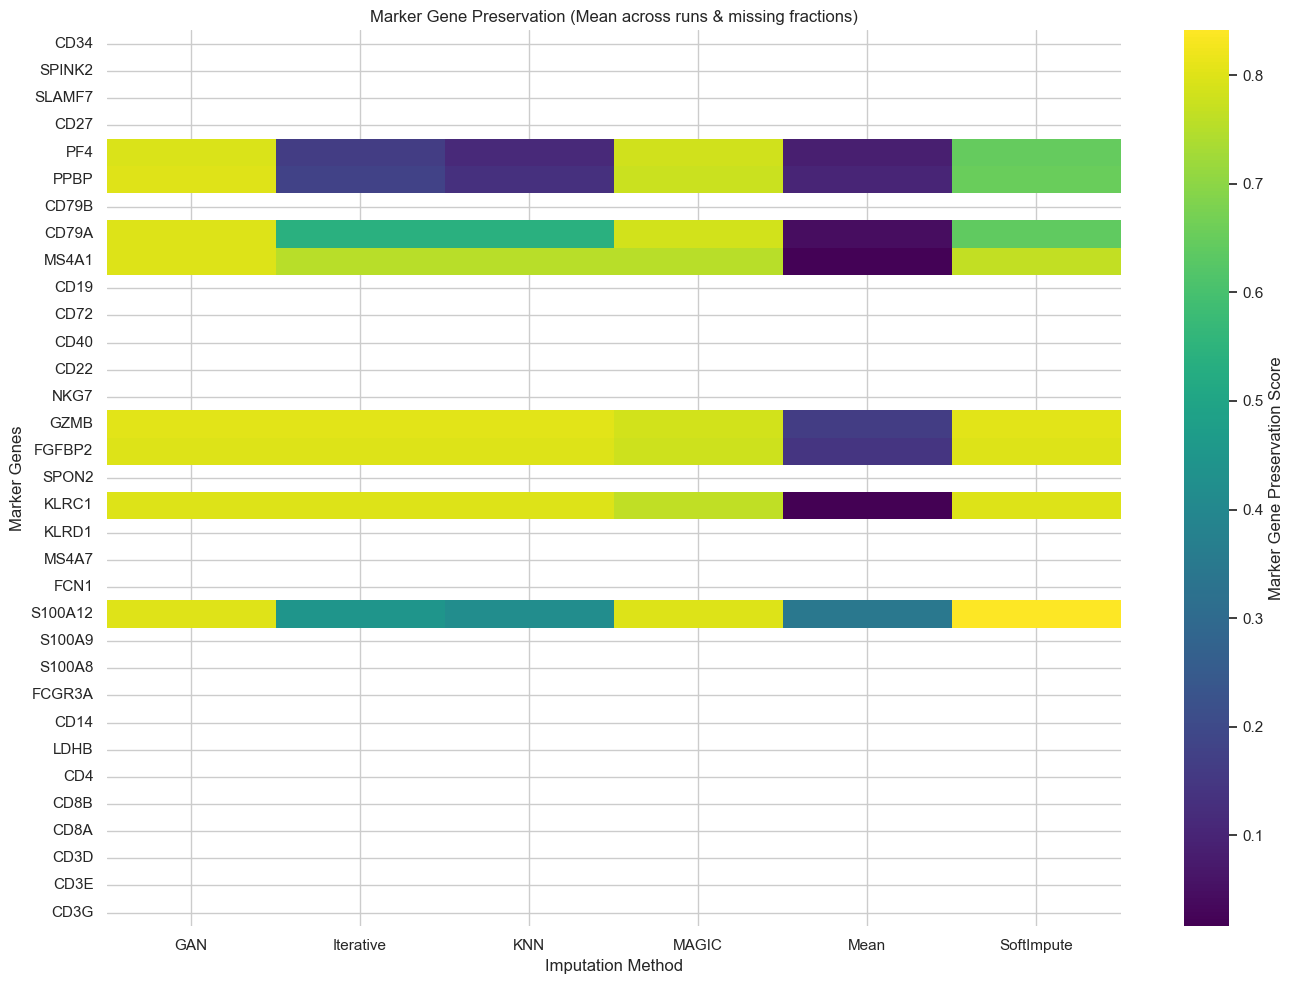

In [6]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Settings
# -----------------------------
sc.settings.verbosity = 0
sns.set(style="whitegrid")

ground_truth_path = "Data/adata_raw_qc.h5ad"

# Folders for each method
imputed_dirs = {
    "SoftImpute": "imputed_softimpute",
    "MAGIC": "imputed_h5ad",
    "KNN": "imputed_knn",
    "Mean": "imputed_mean",
    "GAN": "imputed_gan",
    "Iterative": "imputed_iterative"
}

# Define marker genes (from your list)
marker_genes = [
    "CD34", "SPINK2", "SLAMF7", "CD27", "PF4", "PPBP",
    "CD79B", "CD79A", "MS4A1", "CD19", "CD72", "CD40", "CD22",
    "NKG7", "GZMB", "FGFBP2", "SPON2", "KLRC1", "KLRD1",
    "MS4A7", "FCN1", "S100A12", "S100A9", "S100A8", "FCGR3A",
    "CD14", "LDHB", "CD4", "CD8B", "CD8A", "CD3D", "CD3E", "CD3G"
]

# -----------------------------
# Helper functions
# -----------------------------
def preprocess_adata(adata):
    """Ensure clean AnnData."""
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata.X = np.nan_to_num(adata.X, nan=0.0, posinf=0.0, neginf=0.0)
    return adata

def check_marker_gene_preservation(adata_gt, adata_imp, markers):
    """Compare average expression of marker genes between GT and imputed."""
    preserved = {}
    for gene in markers:
        if gene not in adata_gt.var_names or gene not in adata_imp.var_names:
            preserved[gene] = np.nan
            continue
        mean_gt = np.mean(adata_gt[:, gene].X)
        mean_imp = np.mean(adata_imp[:, gene].X)
        if mean_gt > 0 and mean_imp > 0:
            preserved[gene] = min(mean_gt, mean_imp) / max(mean_gt, mean_imp)
        else:
            preserved[gene] = np.nan
    return preserved

# -----------------------------
# Load ground truth
# -----------------------------
print(" Preprocessing ground truth...")
adata_gt = sc.read_h5ad(ground_truth_path)
adata_gt = preprocess_adata(adata_gt)

# -----------------------------
# Evaluate all methods
# -----------------------------
results = []

for method, imputed_dir in imputed_dirs.items():
    if not os.path.exists(imputed_dir):
        print(f"Skipping {method}, folder not found: {imputed_dir}")
        continue

    for fname in os.listdir(imputed_dir):
        if not fname.endswith(".h5ad"):
            continue

        fpath = os.path.join(imputed_dir, fname)
        try:
            adata_imp = sc.read_h5ad(fpath)
            adata_imp = preprocess_adata(adata_imp)

            # Align cells
            common_cells = adata_gt.obs_names.intersection(adata_imp.obs_names)
            adata_gt_sub = adata_gt[common_cells]
            adata_imp_sub = adata_imp[common_cells]

            # --- Marker preservation ---
            marker_corrs = check_marker_gene_preservation(adata_gt_sub, adata_imp_sub, marker_genes)

            # Parse metadata
            mf, run = None, None
            for part in fname.split("_"):
                if part.startswith("mf"):
                    mf = float(part.replace("mf", "").replace(".h5ad", "")) / 100
                if part.startswith("run"):
                    run = int(part.replace("run", "").replace(".h5ad", ""))

            res = {"file": fname, "method": method, "missing_fraction": mf, "run": run}
            res.update(marker_corrs)
            results.append(res)

            print(f"✅ {method} - {fname}: marker preservation computed")

        except Exception as e:
            print(f"❌ Error with {method} - {fname}: {e}")

# -----------------------------
# Results DataFrame
# -----------------------------
results_df = pd.DataFrame(results)
results_df.to_csv("marker_gene_preservation.csv", index=False)
print("\n✅ Saved results to marker_gene_preservation.csv")

# -----------------------------
# Heatmap
# -----------------------------
marker_data = results_df.groupby("method")[marker_genes].mean().T

plt.figure(figsize=(14, 10))
sns.heatmap(
    marker_data,
    annot=False,
    cmap="viridis",
    cbar_kws={'label': 'Marker Gene Preservation Score'}
)
plt.title("Marker Gene Preservation (Mean across runs & missing fractions)")
plt.ylabel("Marker Genes")
plt.xlabel("Imputation Method")
plt.tight_layout()
plt.show()


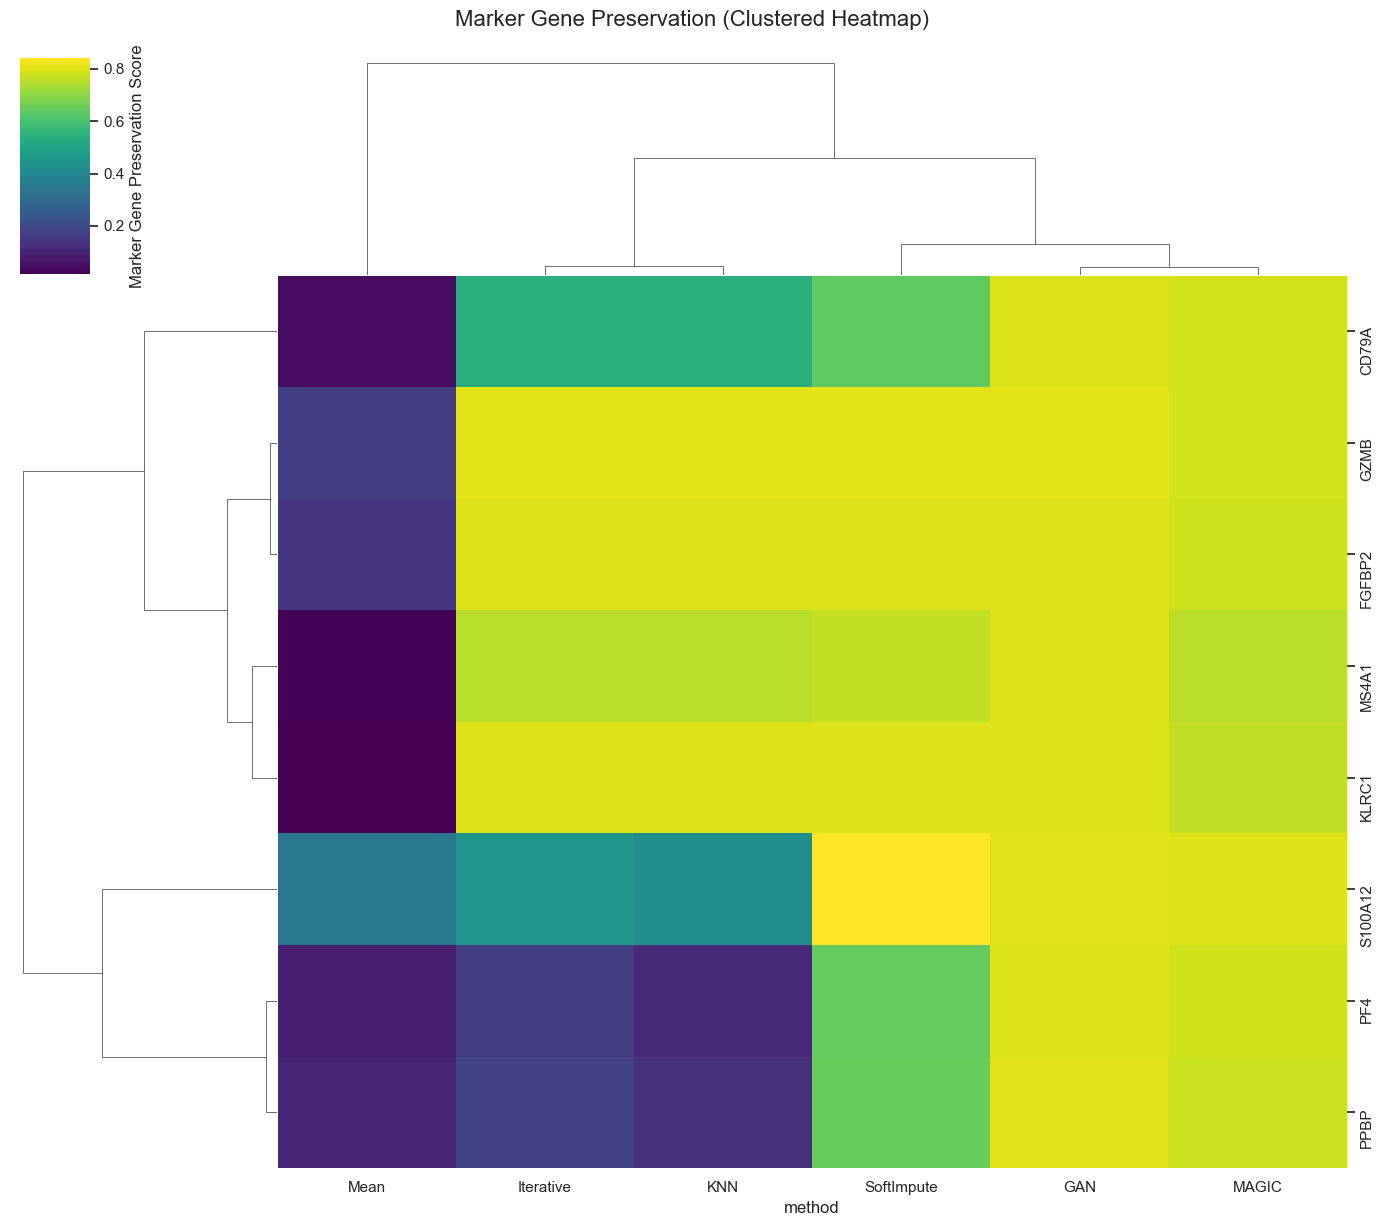

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Load results
# -----------------------------
results_df = pd.read_csv("evaluation_marker_genes.csv")

# Extract marker gene columns only
marker_cols = [c for c in results_df.columns if c.startswith("Marker_")]

# Convert long → wide (genes x methods)
marker_data = (
    results_df.groupby("method")[marker_cols]
    .mean()  # average across runs & missing fractions
    .T       # transpose → genes as rows
)

# Clean column names
marker_data.index = [g.replace("Marker_", "") for g in marker_data.index]

# Drop genes missing everywhere
marker_data = marker_data.dropna(how="all")

# -----------------------------
# Clustered heatmap
# -----------------------------
sns.clustermap(
    marker_data,
    cmap="viridis",
    col_cluster=True,
    row_cluster=True,
    figsize=(14, 12),
    cbar_kws={'label': 'Marker Gene Preservation Score'}
)

plt.suptitle("Marker Gene Preservation (Clustered Heatmap)", y=1.02, fontsize=16)
plt.show()


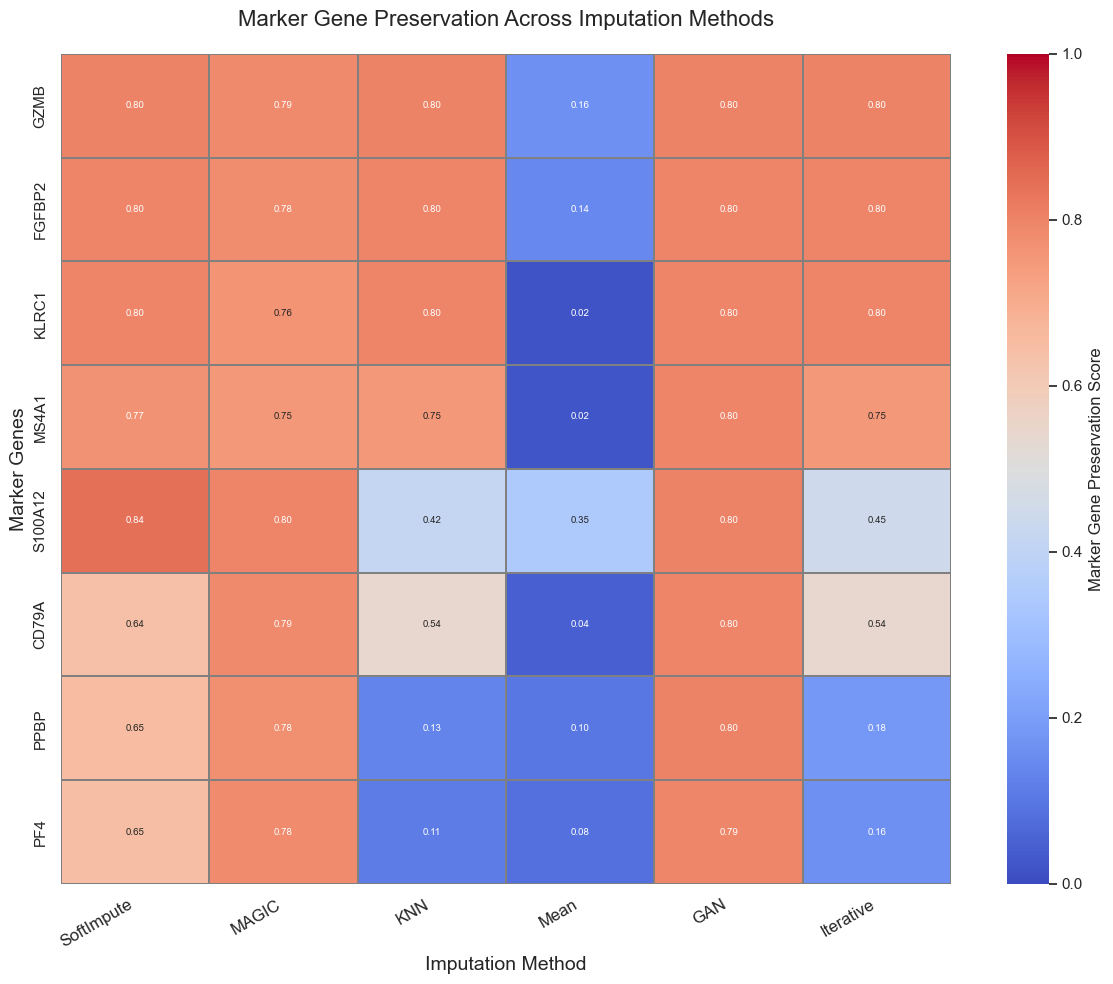

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Load results
# -----------------------------
results_df = pd.read_csv("evaluation_marker_genes.csv")

# Extract marker gene columns only
marker_cols = [c for c in results_df.columns if c.startswith("Marker_")]

# Aggregate across runs & missing fractions
marker_data = (
    results_df.groupby("method")[marker_cols]
    .mean()
    .T
)

# Clean column names
marker_data.index = [g.replace("Marker_", "") for g in marker_data.index]

# Drop genes missing everywhere
marker_data = marker_data.dropna(how="all")

# Reorder methods for consistency (publication style)
method_order = ["SoftImpute", "MAGIC", "KNN", "Mean", "GAN", "Iterative"]
marker_data = marker_data[method_order]

# Optional: order genes by mean preservation
gene_order = marker_data.mean(axis=1).sort_values(ascending=False).index
marker_data = marker_data.loc[gene_order]

# -----------------------------
# Heatmap (publication ready)
# -----------------------------
plt.figure(figsize=(12, 10))

ax = sns.heatmap(
    marker_data,
    cmap="coolwarm",
    vmin=0, vmax=1,
    cbar_kws={'label': 'Marker Gene Preservation Score'},
    linewidths=0.3,
    linecolor="gray",
    annot=True, fmt=".2f", annot_kws={"size": 7},  # optional: show exact values
)

# Labels & titles
ax.set_title("Marker Gene Preservation Across Imputation Methods", fontsize=16, pad=20)
ax.set_xlabel("Imputation Method", fontsize=14)
ax.set_ylabel("Marker Genes", fontsize=14)

# Tick labels formatting
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.tight_layout()
plt.show()
